# Dataset 

In [ ]:
#Dataset => https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [125]:
"""Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
13 - type (1 : red/ 0 : white)"""

'Attribute Information:\n\nFor more information, read [Cortez et al., 2009].\nInput variables (based on physicochemical tests):\n1 - fixed acidity\n2 - volatile acidity\n3 - citric acid\n4 - residual sugar\n5 - chlorides\n6 - free sulfur dioxide\n7 - total sulfur dioxide\n8 - density\n9 - pH\n10 - sulphates\n11 - alcohol\nOutput variable (based on sensory data):\n12 - quality (score between 0 and 10)\n13 - type (1 : red/ 0 : white)'

# Librairies

In [170]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np
import matplotlib. pyplot as plt

# Merge our 2 datasets

In [127]:
df_red = pd.read_csv('winequality-red.csv',sep=';')
df_red['Type'] = 1
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [128]:
df_white = pd.read_csv('winequality-white.csv',sep=';')
df_white['Type'] = 0
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [129]:
df=pd.concat([df_red, df_white])

In [176]:
df.shape

(6497, 13)

In [130]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [131]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

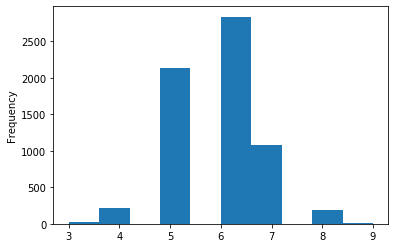

In [132]:
df.quality.plot.hist(bins=10)

# Cleanin data

In [149]:
df.columns
#Clean columns name
df = df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})

In [150]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


understand data, check for null values, check for correlation, visualize data, check for interesting insights

build an ols model, check results. 
modify data, scale data, add or remove columns. check for mulcollininearity, heteroskeadacity, for VIF, check if data is normalized.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [152]:
#No Id column to drop 

In [153]:
df.isna().sum()
#No missing values to clean (lucky team ;)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

# Modeling

In [178]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Type                      int64
dtype: object

In [154]:
y=df.quality
X=df.drop('quality',axis=1)

In [155]:
model=sm.OLS(y,add_constant(X))

In [156]:
model_fit=model.fit()

In [157]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:13:49   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  104.3904     14.105      7.401      0.000      76.741     132.040
fixed_acidity            0.0851      0.016      5.396      0.000       0.054       0.116
volatile_acidity        -1.4924      0.081    -18.345      0.000      -1.652      -1.333
citric_acid             -0.0626      0.080     -0.786      0.432      -0.219       0.094
residual_sugar           0.0624      0.006     10.522      0.000       0.051       0.074
chlorides               -0.7573      0.334     -2.264      0.024      -1.413      -0.102
free_sulfur_dioxide      0.0049      0.001      6.443      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -4.333      0.000      -0.002      -0.001
density               -103.9096     14.336     -7.248      0.000    -132.013     -75.806
pH                       0.4988      0.091      5.506      0.000       0.321       0.676
sulphates                0.7217      0.076      9.466      0.000       0.572       0.871
alcohol                  0.2227      0.018     12.320      0.000       0.187       0.258
Type                     0.3613      0.057      6.367      0.000       0.250       0.473
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
def func(column,X):
    #drop the column
    if column:
        X=X.drop(column, axis=1)
    # build the model
    model=sm.OLS(y,add_constant(X))
    #fit it
    model_fit=model.fit()
    #display the model
    display(model_fit.summary())
    #return X without the column
    return X

# P-Hacking

**P-value is probability of being wrong by rejecting Null Hypothesis**. Never forget about it, please

For the case of F statistics, The Null Hypothesis is:

H0: ß0=ß1=ß2...=ßn=0

H1: at least 1 of ß is not equal to 0

In [160]:
#columns droped : 'citric acid', chlorides	
X=func('chlorides',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     272.5
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:14:08   Log-Likelihood:                -7198.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6486   BIC:                         1.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  108.7597     14.001      7.768      0.000      81.312     136.207
fixed_acidity            0.0866      0.015      5.653      0.000       0.057       0.117
volatile_acidity        -1.4878      0.076    -19.469      0.000      -1.638      -1.338
residual_sugar           0.0645      0.006     10.971      0.000       0.053       0.076
free_sulfur_dioxide      0.0049      0.001      6.389      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -4.388      0.000      -0.002      -0.001
density               -108.5104     14.224     -7.629      0.000    -136.394     -80.627
pH                       0.5448      0.089      6.137      0.000       0.371       0.719
sulphates                0.6838      0.075      9.141      0.000       0.537       0.830
alcohol                  0.2225      0.018     12.405      0.000       0.187       0.258
Type                     0.3497      0.056      6.227      0.000       0.240       0.460
==============================================================================
Omnibus:                      141.241   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.845
Skew:                           0.015   Prob(JB):                     4.29e-69
Kurtosis:                       4.078   Cond. No.                     2.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We ended up having the model with only significant features. On the first iteration we had 13 features. Now we have only 11.

R2 is really low - 29.5%. BIC decreased slightly. That means that most likely we still have meaningless features we can get rid of. 

At the same time, our summary tells us that we need to check the assumptions (warning#2). 

# Fitted model

In [162]:
model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     272.5
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:19:35   Log-Likelihood:                -7198.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6486   BIC:                         1.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  108.7597     14.001      7.768      0.000      81.312     136.207
fixed_acidity            0.0866      0.015      5.653      0.000       0.057       0.117
volatile_acidity        -1.4878      0.076    -19.469      0.000      -1.638      -1.338
residual_sugar           0.0645      0.006     10.971      0.000       0.053       0.076
free_sulfur_dioxide      0.0049      0.001      6.389      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -4.388      0.000      -0.002      -0.001
density               -108.5104     14.224     -7.629      0.000    -136.394     -80.627
pH                       0.5448      0.089      6.137      0.000       0.371       0.719
sulphates                0.6838      0.075      9.141      0.000       0.537       0.830
alcohol                  0.2225      0.018     12.405      0.000       0.187       0.258
Type                     0.3497      0.056      6.227      0.000       0.240       0.460
==============================================================================
Omnibus:                      141.241   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.845
Skew:                           0.015   Prob(JB):                     4.29e-69
Kurtosis:                       4.078   Cond. No.                     2.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
#save it into a file. THe file is also uploaded on the same drive.
model_fit.save("fitted_model.pickle")

In [164]:
# you can read the model using code below. 
fitted_model=sm.load('fitted_model.pickle')
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     272.5
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:19:36   Log-Likelihood:                -7198.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6486   BIC:                         1.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  108.7597     14.001      7.768      0.000      81.312     136.207
fixed_acidity            0.0866      0.015      5.653      0.000       0.057       0.117
volatile_acidity        -1.4878      0.076    -19.469      0.000      -1.638      -1.338
residual_sugar           0.0645      0.006     10.971      0.000       0.053       0.076
free_sulfur_dioxide      0.0049      0.001      6.389      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -4.388      0.000      -0.002      -0.001
density               -108.5104     14.224     -7.629      0.000    -136.394     -80.627
pH                       0.5448      0.089      6.137      0.000       0.371       0.719
sulphates                0.6838      0.075      9.141      0.000       0.537       0.830
alcohol                  0.2225      0.018     12.405      0.000       0.187       0.258
Type                     0.3497      0.056      6.227      0.000       0.240       0.460
==============================================================================
Omnibus:                      141.241   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.845
Skew:                           0.015   Prob(JB):                     4.29e-69
Kurtosis:                       4.078   Cond. No.                     2.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
# First we need to get the predictions
y_pred=model_fit.predict(add_constant(X))

In [166]:
y_pred

0       4.952123
1       4.896634
2       5.015726
3       5.788914
4       4.952123
          ...   
4893    6.141239
4894    5.622378
4895    5.366952
4896    6.462256
4897    6.246741
Length: 6497, dtype: float64

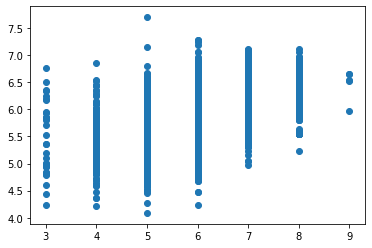

In [171]:
# let's see whether the predictions are lying on the diagonal
plt.scatter(y,y_pred)

In [172]:
# Residuals (error between actual and predicted) should be around 0. So, average should be 0.

(y-y_pred).mean()

-1.114905202688067e-14

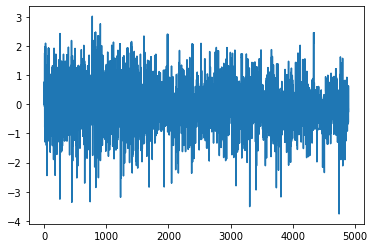

In [173]:
# They should form a white noise. (References). 
plt.plot((y-y_pred))

In [174]:
resid=y-y_pred

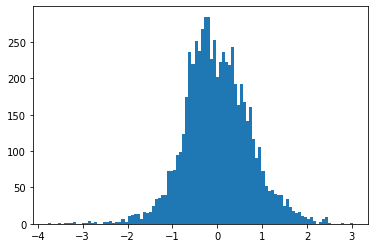

In [175]:
# And they should follow normal distribution
plt.hist(resid,bins=100);